# IMAC2 : TP de filtrage no 1 

## But du travail 

>- Il s'agit de filtrer passe-bas un signal audio; il faudra ensuite apprécier l'effet de ce filtrage d'abord acoustiquement, ensuite mathématiquement (comparaison des spectres avant et après filtrage). 


## Mise en oeuvre

>- Le filtre passe-bas utilisé est un filtre RIF obtenu par la méthode de fenêtrage du filtre passe-bas idéal. 

>- Il faudra comparer les gains de filtres obtenus grâce à différentes fenêtres.



## Méthode de la fenêtre 

Le filtre passe-bas idéal admet comme fonction de transfert 
$$
H_{\text{ideal}}(\nu)=\mathbb{I}_{[-\nu_c,\nu_c]}(\nu)
$$
où $0<\nu_c<\frac{1}{2}$ est la fréquence de coupure du filtre.
La réponse impusionnelle du filtre est calculée par TF inverse et on trouve : 
\begin{equation}
\begin{cases}
h_{\text{ideal}}[0] & =2\nu_{c}\\
h_{\text{ideal}}[n] & =\frac{\sin(2\pi n\nu_{c})}{\pi n}\ \text{si }n\neq0
\end{cases}
\end{equation}

On se donne un entier $N$ pair auquel on associe une fenêtre $w_N[n]$ : celle-ci est un ensemble de $N+1$ poids positifs, symétriques autour de l'indice $\frac{N}{2}$. Exemples (pour $N=4$) : 
>- la fenêtre rectangulaire $w_4^{\text rect}=(1 \ , \ 1 \ , \ 1 \ ,\  1 \  , \  1 )$
>- la fenêtre triangulaire (appelée aussi fenêtre de Bartlett) : 
$w_4^{\text tri}=\frac{1}{3}(1 \ , \ 2 \ , \ 3 \ ,\  2 \  , \  1 )$


La méthode de la fenêtre consiste donc à définir le filtre RIF d'ordre $N$ dont la réponse impulsionnelle est 
\begin{equation}  
\forall n\in\{0,1,...,N\}\ \ h[n]=h_{\text{ideal}}[n-\frac{N}{2}] . w_N[n]
\end{equation}


## Premier travail

>- Choisissez $N=50$

>- Générez trois vecteurs de $N+1$ composantes  $w_1,w_2,w_3$ correspondant respectivement aux fenêtres rectangulaire, Bartlett et Hamming. 

>- Dans une même figure, représentez ces fenêtres 

Aide : pour Hamming , utilisez $\texttt{signal.hamming(N+1)}$. Pour la fenêtre de Bartlett, remarquez que ses valeurs sont données par 
$$
\forall n\in\left\{-\frac{N}{2},...,\frac{N}{2}\right\} \ \ w_N^{\text{tri}}[n]=1+\frac{2(1-N) }{N^2}|n|
$$


## Deuxième travail 

>- Calculez les vecteurs $h_1,h_2,h_3$ correspondant aux réponses impulsionnelles associées aux trois fenêtres définies plus haut. On choisira dans cette partie $\nu_c=0.1$.

>- Dans une même fenêtre divisée en trois graphiques, représentez le gain en décibels de chacun des trois filtres obtenus.  La syntaxe de la fonction permettant de calculer la TF de $h_1$ par exemple est 
 
```
omega , H1 = signal.freqz(h1)

```
(remarque : dans l'exemple précédents, le vecteur des  fréquences se déduit ainsi $\texttt{nu = omega/(2*np.pi)$) 

>- Comparez qualitativement les filtres obtenus en mesurant *grosso modo*  l'oscillation max. (en dB) en bande passante, en bande de coupure, la largeur de la bande de transition  

Vous constaterez que la bande de transition (voir cours) $\delta b$ est au minimum égale à $2/N$ (fenêtre rectangulaire) et en général plutôt de l'ordre de $4/N$
$$
\delta b \simeq \frac{4}{N}
$$


## Troisième travail 

>- importez le fichier $\texttt{la_vibrato.wav}$ dans l'environnement Python 


>- On choisit  une fréquence de coupure 
$$
\nu_c= \frac{3f_0}{2F_e}
$$
où $f_0=440$Hz est la fréquence du son, $F_e$ la fréquence d'échantillonnage. Définissez alors  une valeur de l'ordre du filtre ($N$) permettant de synthétiser un filtre passe-bas ayant la fréquence de compure $\nu_c$ précédente, par exemple :
$$
N=\frac{3}{N}.
$$

>- Calculez  le filtre passe-bas idéal de fréquence $\nu_c$ tronqué grâce à la fenêtre de Hamming d'ordre $N$. 

>- Filtrez le signal. 
Si $h$ est le vecteur de la RI, et $x$ le signal à filtrer, on utilisera la syntaxe
$$y=\texttt{signal.convolve(h,x)}$$

>- Ecoutez le résultat obtenu. 

>- Dans une même fenêtre, visualisez les périodogrammes du signal d'origine et du signal filtré et comparez. 
     

## Quatrième travail

On veut évaluer la qualité acoustique d'un filtre. L'expérience que nous proposons est la suivante : 

>- on synthétise un filtre passe-bande dont la bande passante  $[\nu_1 \ , \ \nu_2]$ avec  
    $$
    \nu_1= \frac{5f_0}{2F_e},
    $$
    $$
    \nu_2= \frac{7f_0}{2F_e}.
    $$

**Aide** : reprenez la méthode vue en cours (synthèse d'un passe-bas puis translation dans le domaine fréquentiel). 

>- filtrez le signal.

>- Dessinez dans une même figure, avec des couleurs différentes,  les périodogrammes  du signal d'origine et du signal filtré.

>- Ecoutez le résultat obtenu. N'entendez-vous que la quinte à l'octave supoérieure? 


In [1]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

    
### A effectuer avant d'enregistrer : 
def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;      


class periodogramme:
    pass
## on conviendra que les champs d'un periodogramme (appelons-le S) sont : 
##  S.val  : les valeurs du spectre 
##  S.nu : le vecteur des fréquences normalisées 
##  S.Fe : la frequence d'echantillonnage en Hz
## EXEMPLE D'APPLICATION :  plt.plot((S.nu)*XS.Fs,S.val)

def creer_periodogramme(valeurs,nu,Fs):
    S=periodogramme()
    S.val=valeurs
    S.nu = nu
    S.Fe = Fs
    return(S)


def calcul_periodogramme(x,Fe):
    ### périodogramme moyenné. Sections de 0.1 seconde
    N=len(x)
    N1=int(np.floor(0.1*Fe))
    K=int(np.floor(N/N1))
    w=signal.hamming(N1)
    ind1 = 0
    ind2 = N1-1
    b = w*x[ind1:(ind2+1)] 
    f, B = signal.periodogram(b, Fe)
    B=B/N1
    while ind2+N1<N:
        ind1=ind1+N1
        ind2=ind2+N1
        b=w*x[ind1:(ind2+1)]
        f, aux = signal.periodogram(b, Fe)
        B=B+aux/N1
    B=B/K
    B=10*np.log10(B)
    return(f,B)
########### fin de la fonction 


    

### le son à filtrer : 
Fe, data = io.read('la_vibrato.wav')   
## L'enregistrement est stereo comme le montre le code suivant :
data.shape
## conversion du signal en mono
x=data[:,0]+data[:,1]   

### Le périodogramme du signal avant filtrage 
f , B = calcul_periodogramme(x,Fe)
plt.plot(f,B)
plt.axis([0,4000 , -50,10])
plt.grid()
plt.show()


<Figure size 640x480 with 1 Axes>

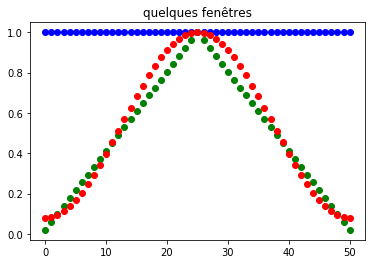

In [2]:
## Correction des parties 1 et 2 : 

N=50
M=int(N/2)
indices=np.arange(-M,M+1)
w_triangle  = 1+ 2*(1-N)/(N*N)*np.abs(indices)
w_hamming = signal.hamming(N+1)

plt.plot(np.ones(N+1),'ob')
plt.plot(w_triangle,'og')
plt.plot(w_hamming,'or')
plt.title("quelques fenêtres")
plt.show()



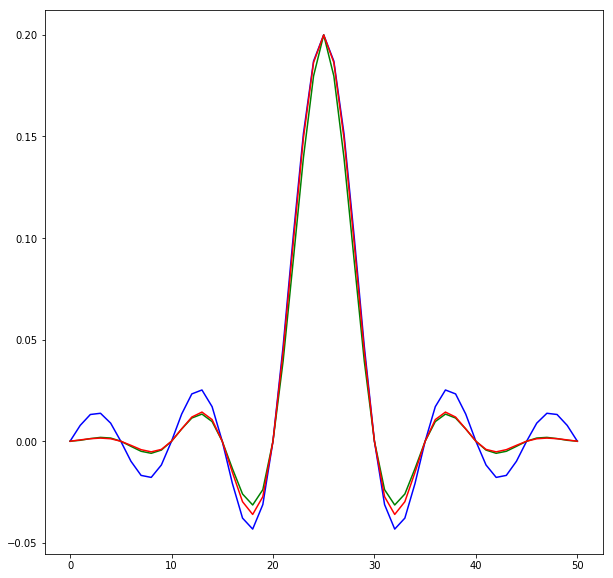

In [4]:
## calcul de la RI du filtre PB ideal entre -N/2 et N/2
def PBideal(N,nu_c): 
    h=np.zeros(N+1)
    M=int(N/2)
    indices=np.arange(-M,M+1)
    aux = indices != 0.0
    ind2 = indices[aux]
    h[aux] = np.sin(2*np.pi*nu_c*ind2)/(np.pi * ind2)
    h[~aux]=2*nu_c
    return(h)

def PBfenetre(N,nu_c,type): 
    h1 = PBideal(N,nu_c); 
    M=int(N/2)
    if type == "rectangle": 
        return(h1)
    if type == "triangle":
        indices=np.arange(-M,M+1)
        w_triangle  = 1+ 2*(1-N)/(N*N)*np.abs(indices)
        return(h1*w_triangle)
    if type == "hamming": 
        w_hamming = signal.hamming(N+1)
        return(h1*w_hamming)
     
### méthode de la fenêtre 
nu_c = 0.1
h1=PBfenetre(N,nu_c,"rectangle")
h2=PBfenetre(N,nu_c,"triangle")
h3=PBfenetre(N,nu_c,"hamming")

plt.figure(1,figsize=(10,10))
plt.clf()
plt.plot(h1,'b')
plt.plot(h2,'g')
plt.plot(h3,'r')

plt.show()


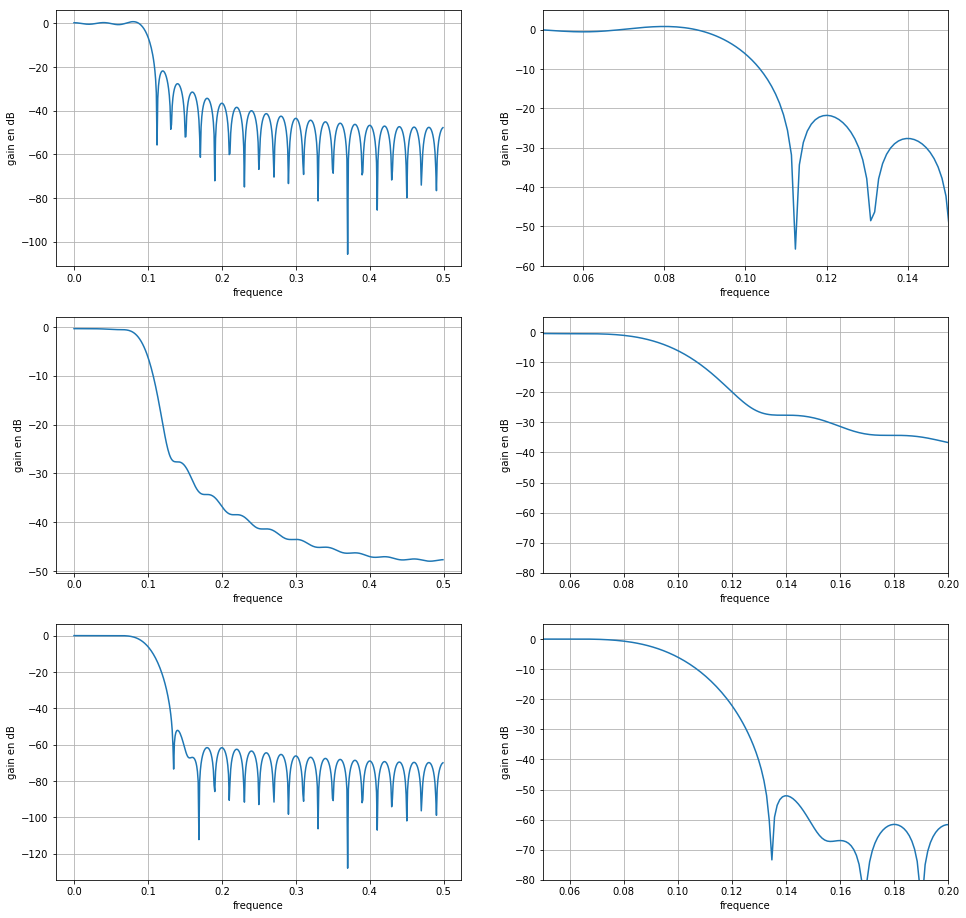

In [5]:
### Gain des filtres 
omega , H1 = signal.freqz(h1)
omega , H2 = signal.freqz(h2)
omega , H3 = signal.freqz(h3)

G1= 20*np.log10(np.abs(H1))
G2= 20*np.log10(np.abs(H2))
G3= 20*np.log10(np.abs(H3))
plt.figure(2,figsize=(16,16))
plt.clf()
plt.subplot(3,2,1)
plt.plot(omega/(2*np.pi) , G1)
plt.grid()
plt.xlabel('frequence')
plt.ylabel('gain en dB')
plt.subplot(3,2,3)
plt.plot(omega/(2*np.pi) , G2)
plt.grid()
plt.xlabel('frequence')
plt.ylabel('gain en dB')
plt.subplot(3,2,5)
plt.plot(omega/(2*np.pi) , G3)
plt.grid()
plt.xlabel('frequence')
plt.ylabel('gain en dB')

plt.subplot(3,2,2)
plt.plot(omega/(2*np.pi) , G1)
plt.axis([0.05, 0.15,-60,5])
plt.grid()
plt.xlabel('frequence')
plt.ylabel('gain en dB')
plt.subplot(3,2,4)
plt.plot(omega/(2*np.pi) , G2)
plt.axis([0.05, 0.2,-80,5])

plt.grid()
plt.xlabel('frequence')
plt.ylabel('gain en dB')
plt.subplot(3,2,6)
plt.plot(omega/(2*np.pi) , G3)
plt.axis([0.05, 0.2,-80,5])

plt.grid()
plt.xlabel('frequence')
plt.ylabel('gain en dB')
plt.show()


<Figure size 432x288 with 0 Axes>

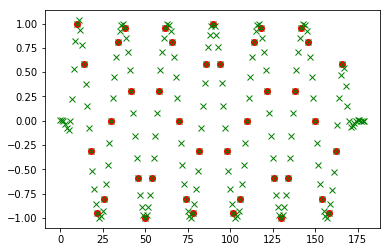

In [8]:
### Application re-echantillonnage
K=40
indices = np.arange(0,K)
x = np.cos(2*np.pi*0.15*indices)

ind2=np.arange(0,4*K,4)
aux = np.array([1 , 0 , 0 , 0 ])
x2 = np.kron(x,aux)
plt.clf()
nu_c=0.5/4
N=20
h3=PBfenetre(N,nu_c,"hamming")
x3 = 4*signal.convolve(x2,h3)
plt.figure(4)
plt.clf()
plt.plot(ind2+N/2,x,'or')
plt.plot(x3,'xg')